# 测试用例：mocha，should，istanbul

## 目标

建立一个 `lesson6` 项目，在其中编写代码。

main.js: 其中有个 `fibonacci` 函数。`fibonacci` 的介绍见：http://en.wikipedia.org/wiki/Fibonacci_number。
        
此函数的定义为 `int fibonacci(int n)`

* 当 n === 0 时，返回 0；n === 1 时，返回 1;
* n > 1 时，返回 fibonacci(n) === fibonacci(n-1) + fibonacci(n-2)，如 fibonacci(10) === 55;
* n 不可大于 10，否则抛错，因为 Node.js 的计算性能没那么强。
* n 也不可小于 0，否则抛错，因为没意义。
* n 不为数字时，抛错。

test/main.test.js: 对 `main` 函数进行测试，并使行覆盖率和分支覆盖率都达到 100%。

## 知识点

1. 学习使用测试框架 mocha: http://mochajs.org
2. 学习使用断言库 should： https://github.com/tj/should.js
3. 学习使用测试率覆盖工具 istanbul： https://github.com/gotwarlost/istanbul
4. 简单 Makefile 的编写： http://blog.csdn.net/haoel/article/details/2886

## 课程内容

首先，作为一个 Node.js 项目，先执行 `npm init` 创建 package.json。

其次，建立我们的 main.js 文件，编写 `fibonacci` 函数。

```
var fibonacci = function (n) {
    if (n === 0) {
        return 0;
    }
    if (n === 1) {
        return 1;
    }
    return fibonacci(n-1) + fibonacci(n-2);
};

if(require.main === module) {
    // 如果是直接执行 main.js,则进入此处
    // 如果 main.js 被其他文件require,则此处不会执行。
    var n = Number(process.argv[2]);
    console.log('fibonacci(' + n +') is', fibonacci(n));
}

```
OK,这只是个简单的实现。

我们可以执行试试

```
$ node main.js 10
```
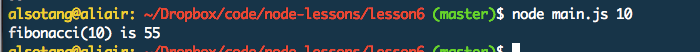

嗯，结果是 55 ，符合预期。

接下来我们开始测试驱动开发，现在简单的实现已经完成，那我们就对它进行一下简单测试吧。

我们先得把 main.js 里面的 fibonacci 暴露出来，这个简单。加一句

`exports.fibonacci = fibonacci;` (要是看不懂这句就去补补 Node.js 的基础知识吧)

就好了。

然后我们在 `test/main.test.js` 中引用我们的 main.js ,并开始一个简单的测试。

```
// file: test/main.test.js 
var main = require('../main');
var should = require('should');

describe('test/main.test.js', function() {
    it('should equal 55 when n === 10', function (){
        main.fibonacci(10).should.equal(55);
    });
});
```
把测试先跑通，我们再讲这段测试代码的含义。

装个全局的 mocha:`$ npm install mocha -g`。

`-g` 与 非 `-g` 的区别，就是安装位置的区别，`g` 是 `global` 的意思。如果不加的话，则安装 `mocha` 在你的项目目录下面；如果加了，则这个 `mocha` 是安装在全局的，如果 `mocha` 有可执行命令的话，那么这个命令也会自动加入到你系统 `$PATH` 中的某个地方（在我的系统中，是这里 `/Users/alsotang/.nvm/v0.10.29/bin`）

在 lesson6 目录下，直接执行

```
$ mocha
```
输出应如下

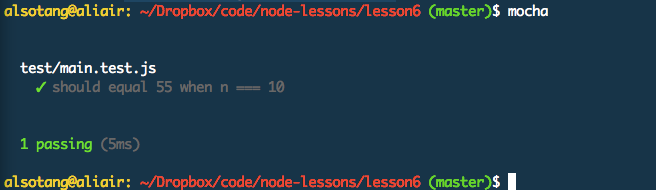

那么，代码中的 describe 和 it 是什么意思呢？其实就是 BDD 中的那些意思，把它们当做语法来记就好了。

大家来看看 nodeclub 中，关于 topicController 的测试文件：

``` https://github.com/cnodejs/nodeclub/blob/master/test/controllers/topic.test.js ```

这文件的内容没有超出之前课程的范围吧。

`describe` 中的字符串，用来描述你要测试的主体是什么；`it` 当中，描述具体的 case 内容。

而引入的那个 should 模块，是个断言库。玩过 ruby 的同学应该知道 `rspec`,rspec 它把测试框架和断言库的事情一起做了，而在 Node.js 中，这两样东西的作用分别是 mocha 和 should 在协作完成。

should 在 js 的 Object "基类" 上注入了一个 `#should` 属性，这个属性中，又有着许许多多的属性可以被访问。

比如测试一个数是不是大于 3，则是 `(5).should.above(3)`;测试一个字符串是否有着特定前缀： `'foobar'.should.startWith('foo');`。should.js API 在：https://github.com/tj/should.js

should.js 如果现在还是 version 3 的话，我倒是推荐大家去看看它的 API 和源码；现在 should 是 version4 了，API 丑的很，但为了不掉队，我还是一直用着它。我觉得 expect 麻烦，所以不用 expect，对了，expect 也是一个断言库：
https://github.com/LearnBoost/expect.js/。

回到正题，还记得我们 fibonacci 函数的几个要求吗？

* 当 n === 0 时，返回 0；n === 1 时，返回 1;
* n > 1 时，返回 fibonacci(n) === fibonacci(n-1) + fibonacci(n-2)，如 fibonacci(10) === 55;
* n 不可大于 10，否则抛错，因为 Node.js 的计算性能没那么强。
* n 也不可小于 0，否则抛错，因为没意义。
* n 不为数字时，抛错。

我们用测试用例来描述一下这几个要求，更新后的 main.test.js 如下：

```
var main = require('../main');
var should = require('should');

describe('test/main.test.js', function () {
  it('should equal 0 when n === 0', function () {
    main.fibonacci(0).should.equal(0);
  });

  it('should equal 1 when n === 1', function () {
    main.fibonacci(1).should.equal(1);
  });

  it('should equal 55 when n === 10', function () {
    main.fibonacci(10).should.equal(55);
  });

  it('should throw when n > 10', function () {
    (function () {
      main.fibonacci(11);
    }).should.throw('n should <= 10');
  });

  it('should throw when n < 0', function () {
    (function () {
      main.fibonacci(-1);
    }).should.throw('n should >= 0');
  });

  it('should throw when n isnt Number', function () {
    (function () {
      main.fibonacci('呵呵');
    }).should.throw('n should be a Number');
  });
});
```

还是比较清晰的吧？

我们这时候跑一下 `$ mocha`，会发现后三个 `case` 都没过。

于是我们更新 `fibonacci` 的实现：

```
var fibonacci = function (n) {
    if (typeof n !== 'number') {
      throw new Error('n should be a Number');
    }
    if (n < 0) {
      throw new Error('n should >= 0');
    }
    if (n > 10) {
      throw new Error('n should <= 10');
    }
    if (n === 0) {
      return 0;
    }
    if (n === 1) {
      return 1;
    }
  
    return fibonacci(n-1) + fibonacci(n-2);
  };
  ```
  
再跑一次 `$ mocha`，就过了。这就是传说中的测试驱动开发：先把要达到的目的都描述清楚，然后让现有的程序跑不过 case，再修补程序，让 case 通过。

安装一个 istanbul :`$ npm i istanbul -g`

执行 `$ istanbul cover _mocha`

这会比直接使用 mocha 多一行覆盖率的输出，

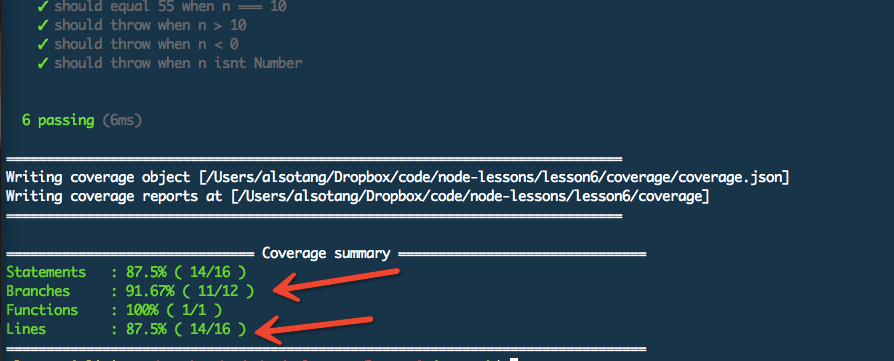

可以看到，我们其中的分支覆盖率是91.67%，行覆盖率是 87.5%。

打开 `open coverage/lcov-report/index.html` 看看


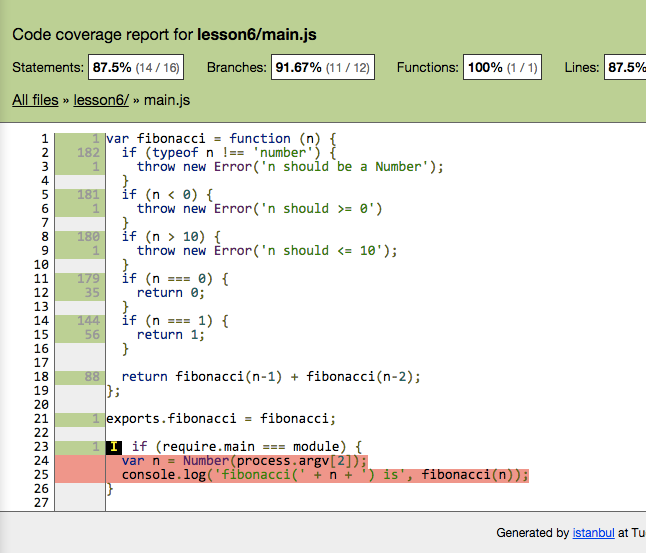


其实这覆盖率是 100% 的，24 25 两行没法测。

mocha 和 istanbul 的结合是相当无缝的，只要 mocha 跑得动，那么 istanbul 就接得进来。

到此这门课其实就完了，剩下要说的内容，都是些比较细节的。比较懒的同学可以踩坑了之后再回来看。

上面的课程，不完美的地方就在于 mocha 和 istanbul 版本依赖的问题，但为了不引入不必要的复杂性，所以上面就没提到这点了。

假设你有一个项目 A，用到了 mocha 的 version 3，其他人有个项目 B，用到了 mocha 的 version 10，那么如果你 npm i mocha -g 装的是 version 3 的话，你用 $ mocha 是不兼容 B 项目的。因为 mocha 版本改变之后，很可能语法也变了，对吧。

这时，跑测试用例的正确方法，应该是

1. `$ npm i mocha --save-dev`,装个 mocha 到项目目录中去
2. `$ ./node_modules/.bin/mocha`,用刚才安装的这个特定版本的 mocha，来跑项目的测试代码。

`./node_modules/.bin` 这个目录下放着我们所有依赖自带的那些可执行文件。

每次输入这个很麻烦对吧？所以我们要引入 Makefile，让 Makefile 帮我们记住复杂的配置。

```
    test:
        ./node_modules/.bin/mocha
```

```
    cov test-cov:
        ./node_modules/.bin/istanbul cover _mocha
```

```
    .PHONY: test cov test-cov
```

这时，我们只需要调用 `make test` 或者 `make cov`,就可以跑我们相应的测试了。

至于 Makefile 怎么写？以及.PHONY是什么意思，请看这里：http://blog.csdn.net/haoel/article/details/2886 ,左耳朵耗子陈皓 2004 年的文章。
